In [9]:
import sys
import pandas as pd
%matplotlib inline
sys.path.insert(0, '../src/')

# file_path = "../data/processed/co2_classification_dataset_fr-de-2021.csv"

# Pour test
file_path = "../data/processed/co2_classification_20240116-234301.csv"

# Convert the loaded data to a DataFrame
df = pd.read_csv(file_path)


In [6]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import shap

from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate, KFold

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


2024-01-13 01:08:47.721470: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-13 01:08:47.953623: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
target = df['Co2Grade']
data = df.drop('Co2Grade', axis=1)

data.head()

MassRunningOrder  BaseWheel  EnginePower  InnovativeTechnology  \
0            1598.0     2558.0         57.0                     0   
1            1598.0     2558.0         57.0                     0   
2            1598.0     2558.0         57.0                     0   
3            1598.0     2558.0         57.0                     0   
4            1598.0     2558.0         57.0                     0   

   ElecRange_NO_RANGE  ElecRange_0to50  ElecRange_50to100  ElecRange_100to150  \
0                   1                0                  0                   0   
1                   1                0                  0                   0   
2                   1                0                  0                   0   
3                   1                0                  0                   0   
4                   1                0                  0                   0   

   ElecRange_150+  Pool_BMW  ...  FuelType_DIESEL  FuelType_DIESEL/ELECTRIC  \
0               0         0  ...                0                         0   
1               0         0  ...                0                         0   
2               0         0  ...                0                         0   
3               0         0  ...                0                         0   
4               0         0  ...                0                         0   

   FuelType_E85  FuelType_ELECTRIC  FuelType_HYDROGEN  FuelType_LPG  \
0             0                  1                  0             0   
1             0                  1                  0             0   
2             0                  1                  0             0   
3             0                  1                  0             0   
4             0                  1                  0             0   

   FuelType_NG  FuelType_NG-BIOMETHANE  FuelType_PETROL  \
0            0                       0                0   
1            0                       0                0   
2            0                       0                0   
3            0                       0                0   
4            0                       0                0   

   FuelType_PETROL/ELECTRIC  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  

[5 rows x 29 columns]

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
encoder = LabelEncoder()
target_encoded = encoder.fit_transform(target)
target_encoded = to_categorical(target_encoded, num_classes=7)

scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target_encoded, test_size=.2, random_state=42)


display(y_train)

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [9]:
from tensorflow.keras import callbacks
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, ReLU, Input
from tensorflow.keras.models import Model

In [16]:


inputs = Input(shape=X_train.shape[1], name='Input')
dense1 = Dense(units=256, activation='relu', kernel_initializer='normal')
dense2 = Dense(units=512, activation='relu', kernel_initializer='normal')
dense3 = Dense(units=512, activation='relu', kernel_initializer='normal')
dense4 = Dense(units=256, activation='relu', kernel_initializer='normal')
dense_last = Dense(units=7, activation='softmax')  # softmax activation for multiclass classification

x = dense1(inputs)
x = dense2(x)
x = dense3(x)
x = dense4(x)
outputs = dense_last(x)

model2 = Model(inputs=inputs, outputs=outputs)
print(model2.summary())

model2.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
#loss=[losses.mean_squared_error,losses.categorical_crossentropy], optimizer='sgd',loss_weights=[1,10]

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 29)]              0         
                                                                 
 dense_11 (Dense)            (None, 256)               7680      
                                                                 
 dense_12 (Dense)            (None, 512)               131584    
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dense_14 (Dense)            (None, 256)               131328    
                                                                 
 dense_15 (Dense)            (None, 7)                 1799      
                                                                 
Total params: 535047 (2.04 MB)
Trainable params: 535047 (2.

In [6]:
input_shape = (X_train.shape[1],)
model = Sequential()
model.add(Dense(units=128, input_shape=input_shape, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

NameError: name 'X_train' is not defined

In [3]:
from tensorflow.keras.models import Model
import datetime
from datetime import datetime


def save_model(model, model_type='other'):
    model_name = type(model).__name__
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    filepath = '../models'
    filename = f"{model_name}_{timestamp}"
    os.makedirs(filepath, exist_ok=True)
    
    if model_type == 'xgb' and isinstance(model, (XGBClassifier, XGBRegressor)):
        filename += '.model'
        full_path = os.path.join(filepath, filename)
        model.save_model(full_path)
    elif model_type == 'keras' and isinstance(model, Model):
        filename += '.h5'
        full_path = os.path.join(filepath, filename)
        save_model(model, full_path)
    else:
        filename += '.pkl'
        full_path = os.path.join(filepath, filename)
        with open(full_path, 'wb') as f:
            pickle.dump(model, f)
    print(f'Model saved at {full_path}')

In [4]:
import pickle
save_model(model2, model_type='keras')

NameError: name 'model' is not defined

In [5]:
save_model(model, model_type='keras')

NameError: name 'model' is not defined

In [12]:


# Suppose you want to use 90% of your CPU cores
num_cores = 16  # replace with the number of CPU cores in your system
num_cores_to_use = int(0.9 * num_cores)

os.environ['TF_NUM_INTEROP_THREADS'] = str(num_cores_to_use)
os.environ['TF_NUM_INTRAOP_THREADS'] = str(num_cores_to_use)

In [13]:
early_stopping = callbacks.EarlyStopping(monitor = 'val_loss',
                        patience = 4,
                        mode = 'min',
                        restore_best_weights = True)

lr_plateau = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                            patience=4,
                            factor=0.8,
                            verbose=2,
                            mode='min')

In [14]:
training_history = model.fit(X_train, y_train, 
          epochs=20, 
          batch_size=20,
          validation_split=.1,
          workers=8,
          use_multiprocessing=True,
          callbacks = [early_stopping,lr_plateau])


Epoch 1/20
150404/150404 [==============================] - 115s 760us/step - loss: 0.3394 - accuracy: 0.8521 - val_loss: 0.2427 - val_accuracy: 0.8998 - lr: 0.0010
Epoch 2/20
150404/150404 [==============================] - 114s 761us/step - loss: 0.2666 - accuracy: 0.8925 - val_loss: 0.2548 - val_accuracy: 0.8913 - lr: 0.0010
Epoch 3/20
150404/150404 [==============================] - 114s 759us/step - loss: 0.2701 - accuracy: 0.8976 - val_loss: 0.2642 - val_accuracy: 0.8863 - lr: 0.0010
Epoch 4/20
150404/150404 [==============================] - 114s 760us/step - loss: 0.2702 - accuracy: 0.8986 - val_loss: 0.2112 - val_accuracy: 0.9148 - lr: 0.0010
Epoch 5/20
150404/150404 [==============================] - 114s 757us/step - loss: 0.2719 - accuracy: 0.8985 - val_loss: 0.2443 - val_accuracy: 0.9007 - lr: 0.0010
Epoch 6/20
150404/150404 [==============================] - 114s 758us/step - loss: 0.2898 - accuracy: 0.8973 - val_loss: 0.2252 - val_accuracy: 0.9094 - lr: 0.0010
Epoch 7/20

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix

26112/26112 [==============================] - 12s 440us/step


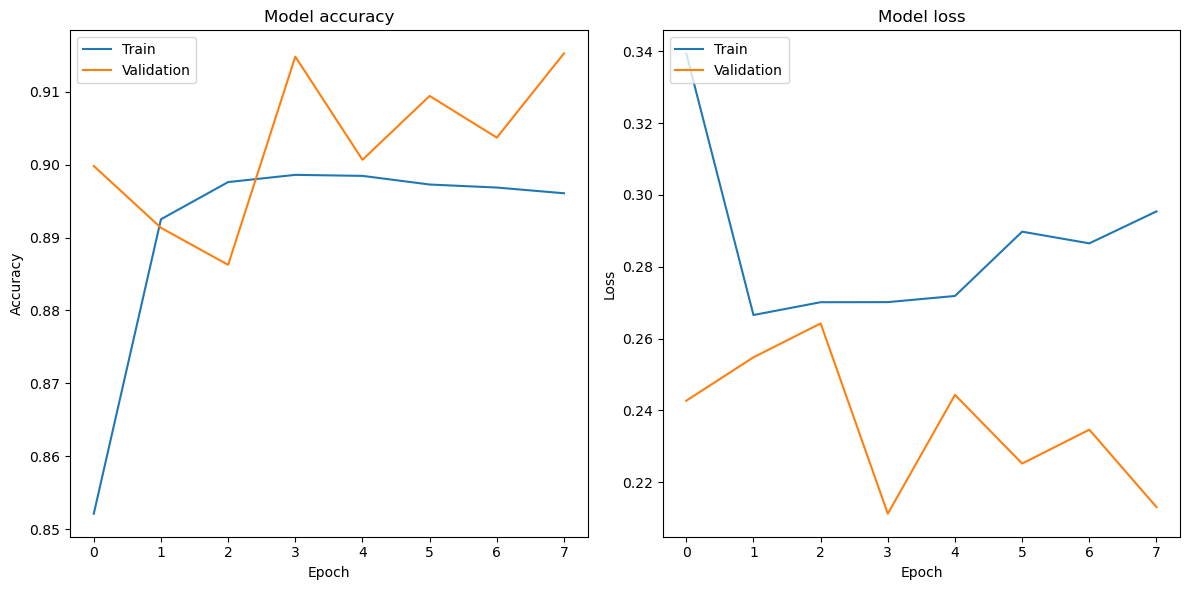

In [39]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [40]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import Image

def plot_training_history(training_history, title='', interactive=True, save=True, format='png'):
    fig = make_subplots(rows=2, cols=1)

    fig.add_trace(go.Scatter(y=training_history.history['accuracy'], mode='lines', name='Train Accuracy'), row=1, col=1)
    fig.add_trace(go.Scatter(y=training_history.history['val_accuracy'], mode='lines', name='Validation Accuracy'), row=1, col=1)
    fig.add_trace(go.Scatter(y=training_history.history['loss'], mode='lines', name='Train Loss'), row=2, col=1)
    fig.add_trace(go.Scatter(y=training_history.history['val_loss'], mode='lines', name='Validation Loss'), row=2, col=1)

    fig.update_xaxes(title_text="Epoch", row=1, col=1)
    fig.update_xaxes(title_text="Epoch", row=2, col=1)

    fig.update_yaxes(title_text="Accuracy", row=1, col=1)
    fig.update_yaxes(title_text="Loss", row=2, col=1)

    fig.update_layout(height=600, width=600, title_text="Model Accuracy and Loss" + title)

    if interactive:
        fig.show()
    else:
        img_bytes = pio.to_image(fig, format=format)
        display(Image(img_bytes))
        
    if save:
        pio.write_image(fig, 'training_history.' + format)

In [42]:
plot_training_history(training_history)

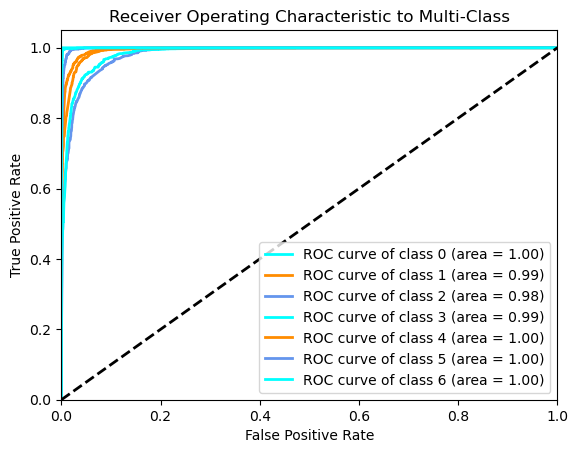

In [44]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i, color in zip(range(n_classes), cycle(['aqua', 'darkorange', 'cornflowerblue'])):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to Multi-Class')
plt.legend(loc="lower right")
plt.show()

In [46]:
def plot_roc_curves(y_test, y_pred, classes, title='', interactive=True, save=True, format='png'):
    # Binarize the output
    y_test_bin = label_binarize(y_test, classes=classes)
    n_classes = y_test_bin.shape[1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Create a Figure
    fig = go.Figure()

    # Add ROC curves to the Figure
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'blue', 'yellow'])
    for i, color in zip(range(n_classes), colors):
        fig.add_trace(go.Scatter(x=fpr[i], y=tpr[i], mode='lines', name='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]), line=dict(color=color)))

    # Add diagonal line
    fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random', line=dict(color='black', dash='dash')))

    # Update layout
    fig.update_layout(title='Receiver Operating Characteristic to Multi-Class'+title, xaxis_title='False Positive Rate', yaxis_title='True Positive Rate', autosize=False, width=600, height=600, margin=dict(l=50, r=50, b=100, t=100, pad=4), paper_bgcolor="LightSteelBlue",)

    # Show or save the Figure
    if interactive:
        fig.show()
    else:
        img_bytes = pio.to_image(fig, format=format)
        display(Image(img_bytes))
        
    if save:
        pio.write_image(fig, 'roc_curves.' + format)
        
        
plot_roc_curves(y_test, y_pred, classes=[0, 1, 2, 3, 4, 5, 6])

In [50]:
def plot_roc_curves(y_test, y_pred, title='', interactive=True, save=True, format='png'):
    # Binarize the output
    classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
    y_test_bin = label_binarize(y_test, classes=classes)
    n_classes = y_test_bin.shape[1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Create a Figure
    fig = go.Figure()

    # Add ROC curves to the Figure
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'blue', 'yellow'])
    for i, color in zip(range(n_classes), colors):
        fig.add_trace(go.Scatter(x=fpr[i], y=tpr[i], mode='lines', name='ROC curve of class {0} (area = {1:0.2f})'.format(classes[i], roc_auc[i]), line=dict(color=color)))

    # Add diagonal line
    fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random', line=dict(color='black', dash='dash')))

    # Update layout
    fig.update_layout(title='Receiver Operating Characteristic to Multi-Class'+title, xaxis_title='False Positive Rate', yaxis_title='True Positive Rate', autosize=False, width=800, height=600, margin=dict(l=50, r=50, b=100, t=100, pad=4))

    # Show or save the Figure
    if interactive:
        fig.show()
    else:
        img_bytes = pio.to_image(fig, format=format)
        display(Image(img_bytes))
        
    if save:
        pio.write_image(fig, 'roc_curves.' + format)
        
plot_roc_curves(y_test, y_pred)    

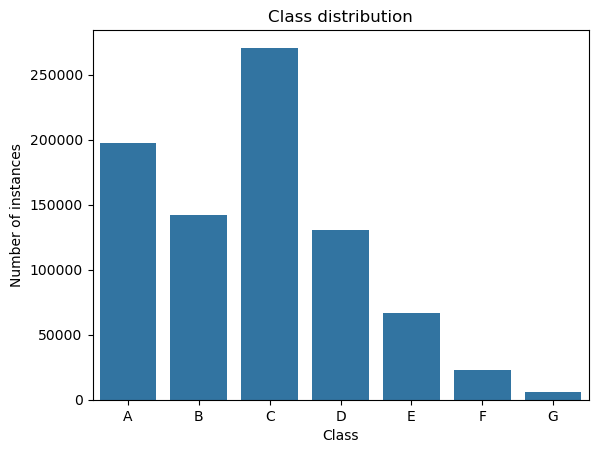

In [53]:
import seaborn as sns
import numpy as np
import pandas as pd

# Convert one-hot encoded labels back to class labels
y_class_labels = np.argmax(y_test, axis=1)

# Convert class labels to their original string representation
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
y_class_labels_str = [classes[label] for label in y_class_labels]

# Create a DataFrame for easier plotting
df = pd.DataFrame({'Class': y_class_labels_str})

# Plot class distribution
sns.countplot(x='Class', data=df, order=classes)
plt.xlabel('Class')
plt.ylabel('Number of instances')
plt.title('Class distribution')
plt.show()

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming X is your features and y is your target
df = pd.DataFrame(data)
df['target'] = target
counts = df['target'].value_counts()

fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts.values, hole=.3, textinfo='label+percent')])

# Update layout to reduce white space
fig.update_layout(
    autosize=False,
    margin=dict(t=50, b=50, l=50, r=50),
    title_text='Class distribution',
    title_x=0.5  # Center the title
)

fig.show()

In [17]:
training_history2 = model2.fit(X_train, y_train, 
          epochs=20, 
          batch_size=20,
          validation_split=.1,
          workers=8,
          use_multiprocessing=True,
          callbacks = [early_stopping,lr_plateau])


Epoch 1/20
150404/150404 [==============================] - 144s 958us/step - loss: 0.2922 - accuracy: 0.8741 - val_loss: 0.2152 - val_accuracy: 0.9108 - lr: 0.0010
Epoch 2/20
150404/150404 [==============================] - 144s 959us/step - loss: 0.2124 - accuracy: 0.9131 - val_loss: 0.2103 - val_accuracy: 0.9100 - lr: 0.0010
Epoch 3/20
150404/150404 [==============================] - 144s 958us/step - loss: 0.2068 - accuracy: 0.9172 - val_loss: 0.1957 - val_accuracy: 0.9208 - lr: 0.0010
Epoch 4/20
150404/150404 [==============================] - 145s 963us/step - loss: 0.2075 - accuracy: 0.9173 - val_loss: 0.2677 - val_accuracy: 0.9202 - lr: 0.0010
Epoch 5/20
150404/150404 [==============================] - 145s 962us/step - loss: 0.2103 - accuracy: 0.9168 - val_loss: 0.2194 - val_accuracy: 0.9164 - lr: 0.0010
Epoch 6/20
150404/150404 [==============================] - 145s 963us/step - loss: 0.2172 - accuracy: 0.9152 - val_loss: 0.2080 - val_accuracy: 0.9233 - lr: 0.0010
Epoch 7/20

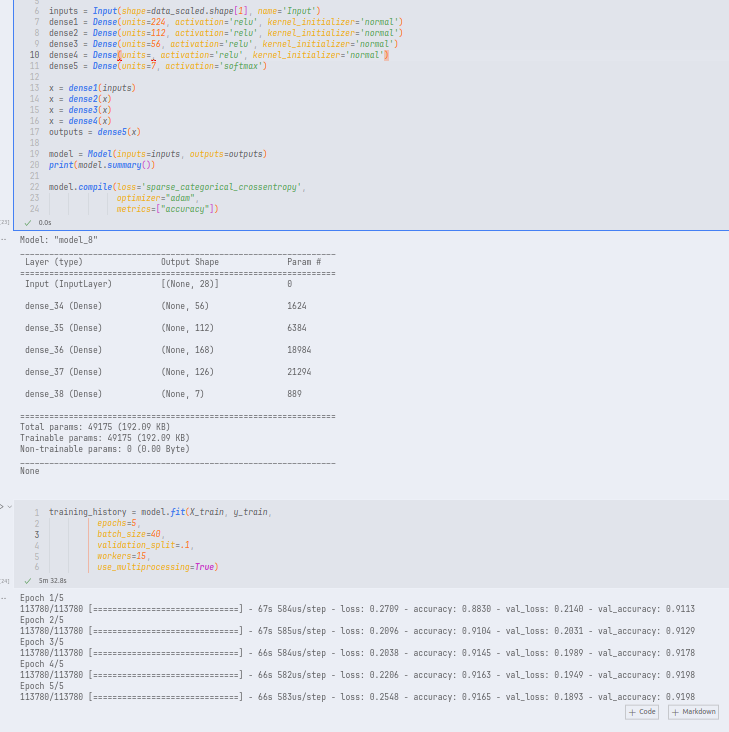